### Normalización Z-score
#### En scikitlearn se conoce como estandar

In [2]:
import timeit #sirve para medir el performance de un modelo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
#importamos datasets y un modelo de regresion lineal#
from sklearn.preprocessing import MinMaxScaler

In [3]:
scaler = MinMaxScaler()
X,y = datasets.load_diabetes(return_X_y = True)
#X indica el indice de masa corporal en la columna 3 y otros datos
#y es una medida cuantitativa de la progresión de la enfermedad despues de un año de inicio
raw = X[:, None,2]#None crea un nuevo arreglo#

NameError: name 'diabetes' is not defined

In [4]:
#reglas de escalamiento
max_raw=max(raw)
min_raw=min(raw)
#los datos ya estan escalados 
scaled=(2*raw-min_raw)/(max_raw-min_raw)
scaled=scaler.fit_transform(raw)

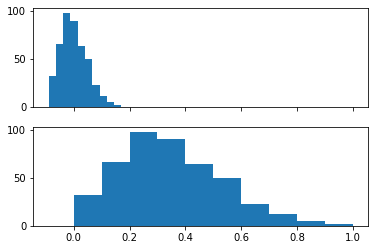

In [5]:
#Es un arreglo de graficos
#axs es un eje como quiero que se muestren nuestros graficos
#2 = fila
#1 = columna
#sharex que compartan el x
fig, axs = plt.subplots(2,1,sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)
plt.show()

In [14]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [18]:
# los modelos de entrenamiento, vamos a definir unas funciones
#La variable "Y" es lo que buscamos predecir

def train_raw():
    linear_model.LinearRegression().fit(raw,y)#como se muestran los datos cuando no estan ajustados#

def train_scaled():
    linear_model.LinearRegression().fit(scaled,y)#como se muestran los datos cuando se ajustan#
    
#tenemos 2 funciones train_raw con datos no escalados
#y train_scale con datos escalados


In [1]:
#el tiempo o performance que se demoran en ejecutarse
raw_time=timeit.timeit(train_raw,number=100)#que se repita 100 veces#
scaled_time=timeit.timeit(train_scaled,number=100)#que repita 100 veces
print("train raw:{}".format(raw_time))
print("train scaled:{}".format(scaled_time))

NameError: name 'timeit' is not defined

### evidenciamos una reducción en el tiempo de ejecución(que era lo que buscamos observar), escalar los datos contribuye al algoritmo.
-max-min scalling:es mejor para datos uniformemente definidos

-z-score scalling: es mejor para datos con una distribución normal.

In [25]:
#Z-Score
#promedio = np.mean(raw)
promedio = raw.mean()
desviacion_estandar=raw.std()
scaled_z=(raw-promedio)/desviacion_estandar

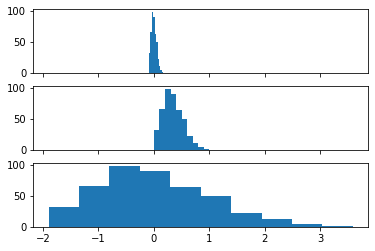

In [28]:
fig, axs = plt.subplots(3,1,sharex=True)
axs[0].hist(raw)
axs[1].hist(scaled)
axs[2].hist(scaled_z)
plt.show()

In [29]:
def train_scaled_z():
    linear_model.LinearRegression().fit(scaled_z,y)

In [34]:
#Performance
scaled_z_time=timeit.timeit(train_scaled_z,number=100)
print("train raw:{}".format(raw_time))
print("train scaled:{}".format(scaled_time))
print("train scaled z:{}".format(scaled_z_time))

train raw:0.15615660000003118
train scaled:0.09537499999987631
train scalez z:0.12787130000015168


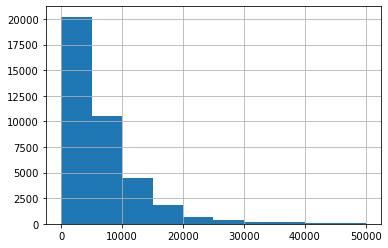

In [36]:
#usaremos el dataset cars xq esta fuertemente sesgado
df=pd.read_csv("cars.csv")
df.price_usd.hist()
plt.show()

<AxesSubplot:>

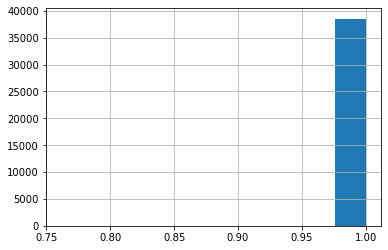

In [41]:
df.price_usd.apply(lambda x: np.tanh(x)).hist()

<AxesSubplot:>

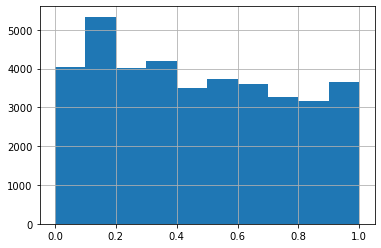

In [44]:
#no nos entrega un valor deseada, dividiremos por otro valor
p=10000
df.price_usd.apply(lambda x: np.tanh(x/p)).hist()

In [ ]:
#vemos como ocurrio un cambio en la funcion